# Bibliotecas

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory, split_dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

# Parte 1

In [80]:
# Definição do diretório para o conjunto de treino
directory_train = "cats_and_dogs/train"

In [82]:
# Carregar os dados de treino
dados_treino = image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(128, 128),
    shuffle=True,
    seed=322,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 2000 files belonging to 2 classes.


In [83]:
# Contagem das imagens para cada classe no conjunto de treino
catstreino = 0
dogstreino = 0

for images, labels in dados_treino:
    np_labels = labels.numpy().astype(int)
    catstreino += np.count_nonzero(np_labels == 0)
    dogstreino += np.count_nonzero(np_labels == 1)

print(f"Cats: {catstreino}")
print(f"Dogs: {dogstreino}")

Cats: 1000
Dogs: 1000


In [85]:
# Definição do diretório para o conjunto de validação
directory_validation = "cats_and_dogs/validation"

In [86]:
# Separação do conjunto de validação para validação e treino
dados_validation = image_dataset_from_directory(
    directory_validation,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(128, 128),
    shuffle=True,
    seed=322,
    validation_split=0.5,
    subset='both',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 1000 files belonging to 2 classes.
Using 500 files for training.
Using 500 files for validation.


In [87]:
test_ds, val_ds = dados_validation

In [88]:
# Contagem das imagens para cada classe no conjunto de teste
catsteste = 0
dogsteste = 0

for images, labels in test_ds:
    np_labels = labels.numpy().astype(int)
    catsteste += np.count_nonzero(np_labels == 0)
    dogsteste += np.count_nonzero(np_labels == 1)

print(f"Cats: {catsteste}")
print(f"Dogs: {dogsteste}")

Cats: 249
Dogs: 251


In [89]:
# Contagem das imagens para cada classe no conjunto de validação
catsval = 0
dogsval = 0

for images, labels in val_ds:
    np_labels = labels.numpy().astype(int)
    catsval += np.count_nonzero(np_labels == 0)
    dogsval += np.count_nonzero(np_labels == 1)

print(f"Cats: {catsval}")
print(f"Dogs: {dogsval}")

Cats: 251
Dogs: 249


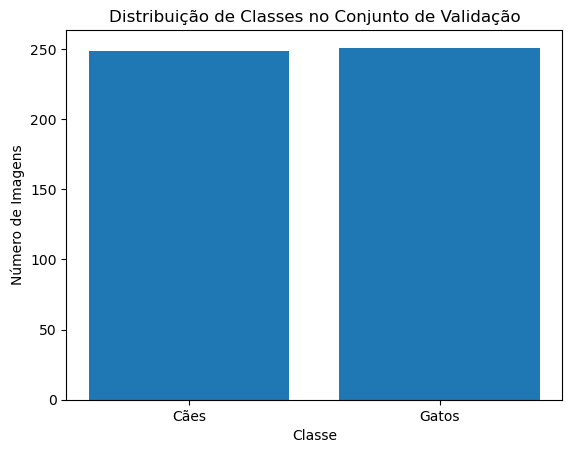

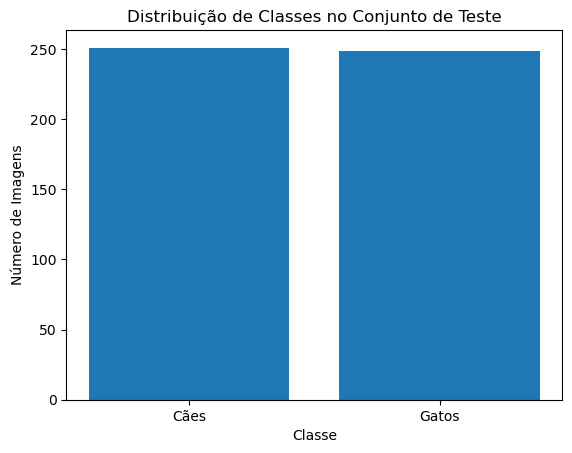

In [90]:
# Visualização da distribuição das classes no conjunto de validação
plt.bar(['Cães', 'Gatos'], [dogsval, catsval])
plt.xlabel('Classe')
plt.ylabel('Número de Imagens')
plt.title('Distribuição de Classes no Conjunto de Validação')
plt.show()

# Visualização da distribuição das classes no conjunto de teste
plt.bar(['Cães', 'Gatos'], [dogsteste, catsteste])
plt.xlabel('Classe')
plt.ylabel('Número de Imagens')
plt.title('Distribuição de Classes no Conjunto de Teste')
plt.show()

# Parte 2

In [ ]:
# Normalização dos dados
dados_treino_nor = dados_treino.map(lambda x,y : (x / 255.0, y))
val_ds_nor = val_ds.map(lambda x,y : (x / 255.0, y))
test_ds_nor = test_ds.map(lambda x,y : (x / 255.0, y))

In [ ]:
# Definir o caminho onde os pesos serão salvos
checkpoint_filepath = "tmp/best_model.weights.h5"

# Callback para salvar os melhores pesos
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
# Definição da rede neuronal convolucional
tf.random.set_seed(42)
model_1 = Sequential()
# Input layer básico, com 16 filtros porque as imagens são 'grandes' (16 ou 32 são escolhas comuns para começar) e um kernel pequeno, para ser mais rápido
model_1.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation='relu', input_shape = (128, 128, 3)))
# Segundo layer convolucional, maior que primeiro mas com o mesmo kernel
model_1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation='relu'))
# Layer de pooling para reduzir na saída
model_1.add(MaxPooling2D(pool_size = (2, 2)))
# Layer de Dropout para evitar overfitting
model_1.add(Dropout(0.41))
# Terceiro layer convolucional, maior que segundo mas com o mesmo kernel
model_1.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation='relu'))
# Layer de pooling para reduzir na saída
model_1.add(MaxPooling2D(pool_size = (2, 2)))
# Layer de Dropout para evitar overfitting
model_1.add(Dropout(0.62))
# Quarto layer convolucional, maior que terceiro mas ainda com o mesmo kernel
model_1.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation='relu'))
# Layer de pooling para reduzir na saída
model_1.add(MaxPooling2D(pool_size = (2, 2)))
# Layer de Dropout para evitar overfitting
model_1.add(Dropout(0.7))
# Flatten para criar a ligações para a camada Dense
model_1.add(Flatten())
# Dense com 64 neurónios
model_1.add(Dense(64, activation='relu'))
# Layer de Dropout para evitar overfitting
model_1.add(Dropout(0.6))
# Output layer com 1 neurónio e classificação binária usando o sigmoid
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,194,721 (8.37 MB)

 Trainable params: 2,194,721 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

**Análise dos parâmetros do modelo:**
- **Camada Convolucional 1**: Aplica 16 filtros convolucionais de tamanho 3×3, com 1 canal de entrada. O número de parâmetros treináveis é (3×3×1×16)+16=448.
- **Camada Convolucional 2**: Aplica 32 filtros convolucionais de tamanho 3×3, com 16 canais de entrada. O número de parâmetros treináveis é (3×3×16×32)+32=4.640.
- **Camada Convolucional 3**: Aplica 64 filtros convolucionais de tamanho 3×3, com 32 canais de entrada. O número de parâmetros treináveis é (3×3×32×64)+64=18.496.
- **Camada Convolucional 4**: Aplica 128 filtros convolucionais de tamanho 3×3, com 64 canais de entrada. O número de parâmetros treináveis é (3×3×64×128)+128=73.856.
- **Camada Densa Oculta**: Conecta os 16×16×128=32.768 elementos da camada Flatten a 64 neurónios, resultando em (32.768×64)+64=2.097.216 parâmetros treináveis.
- **Camada Densa de Saída**: Conecta os 64 neurónios da camada anterior a 1 neurónio de saída, resultando em (64×1)+1=65 parâmetros treináveis.


In [ ]:
# Callback para Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Treinar o modelo
history_1 = model_1.fit(
    dados_treino_nor,
    epochs=30,
    validation_data=(val_ds_nor),
    callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5090 - loss: 0.7613
Epoch 1: val_loss did not improve from 0.63623
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.5089 - loss: 0.7609 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.5093 - loss: 0.6943
Epoch 2: val_loss did not improve from 0.63623
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.5093 - loss: 0.6943 - val_accuracy: 0.5420 - val_loss: 0.6927
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5105 - loss: 0.6930
Epoch 3: val_loss did not improve from 0.63623
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.5105 - loss: 0.6930 - val_accuracy: 0.5260 - val_loss: 0.6927
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.5363 - loss: 0.6907
Epoch 4: val_loss did not improve from 0.63623
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.5361 - loss: 0.6907 - val_accuracy: 0.5660

In [ ]:
# Restaurar os melhores pesos salvos
model_1.load_weights("tmp/best_model.weights.h5")

#### Accuracy e Função Perda

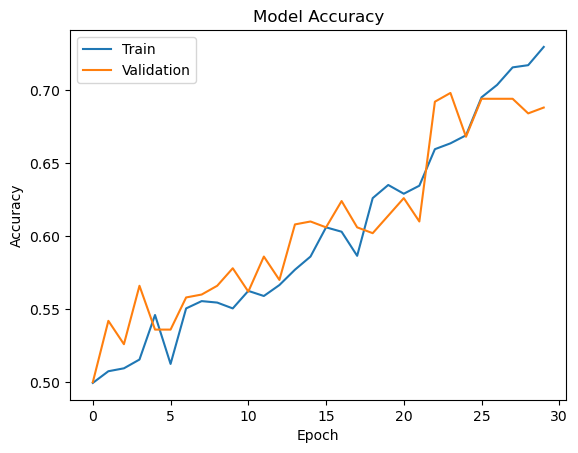

In [ ]:
# Visualização do desenvolvimento do modelo
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

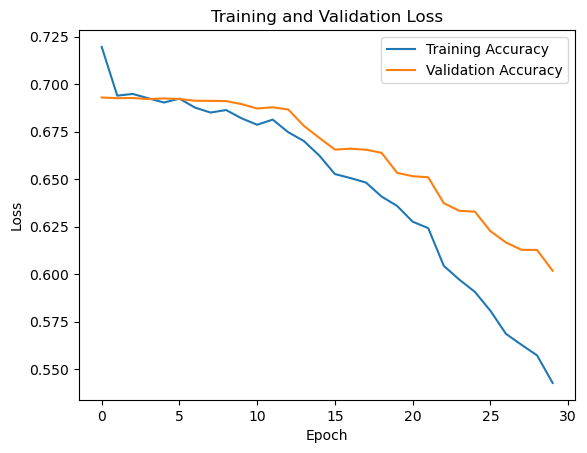

In [ ]:
# Visualização do desenvolvimento da função de perda
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

#### Matriz de Confusão

              precision    recall  f1-score   support

         Cat       0.70      0.81      0.75       249
         Dog       0.77      0.66      0.71       251

    accuracy                           0.73       500
   macro avg       0.74      0.73      0.73       500
weighted avg       0.74      0.73      0.73       500



2025-03-25 11:55:16.477313: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


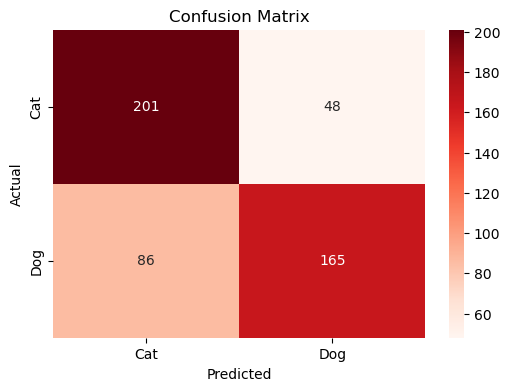

In [ ]:
# Função para obter os valores reais e as previsões do modelo em arrays, para cálculo da confusion matrix e métricas
def get_predictions(model, dataset):
    y_true = []
    y_pred = []

    # Loop para obter os valores reais e previtos. Sendo uma classificação binária, aplica-se o threshold de 0.5 às previsões.
    for images, labels in dataset:
        predictions = model.predict(images, verbose=0)
        y_true.extend(labels.numpy())
        y_pred.extend((predictions > 0.5).astype(int).flatten())

    return np.array(y_true), np.array(y_pred)

# Obter as previsões no conjunto de teste
y_true, y_pred = get_predictions(model_1, test_ds_nor)

# Função para observar as métricas e a matriz de confusão
def metrics_score(actual, predicted, class_names=['Cat', 'Dog']):
    print(classification_report(actual, predicted, target_names=class_names))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

metrics_score(y_true, y_pred)

# Parte 3

Utilize transferência de conhecimento com vista a melhorar os resultados atingidos na Parte 2. Para tal deverá utilizar como base duas CNNs pré-treinadas à sua escolha, de entre as disponibilizadas pelo Tensorflow/Keras. A única restrição é que as duas redes deverão ser provenientes de duas famílias distintas. Veja a documentação para determinar se, consoante as arquiteturas escolhidas, será ou não necessário aplicar algum tipo de pre-processamento às imagens (por exemplo normalizar os valores dos pixels, redimensionar as imagens, trocar canais de cor, etc.).

Escolhemos duas familias para realizar esta tarefa: EfficientNet, e ResNet.

## Modelos EfficientNet

Para os modelos da familia EfficientNet (que compreendem do B0 ao B7), fomos utilizar a versão base da familia (EfficientNetB0).

Procedemos a realizar as seguintes abordagens:

- EfficientNetB0 A --> com as camadas convolucionais congeladas, utilizando apenas o classificador final, treinado com um *learning rate* de 0.001.
- EfficientNetB0 B --> com as camadas convolucionais congeladas, utilizando apenas o classificador final, treinado com um *learning rate* de 0.0001.
- EfficientNetB0 C --> com as últimas 20 camadas descongeladas, permitindo ajustá-las ao nosso problema. Foram ainda adicionadas duas camadas densas com ativação *ReLU*, com o objetivo de analisar o impacto dessas camadas no desempenho do modelo. Treinado com um *learning rate* de 0.0001.

Sendo este um problema de classificação binária, foi utilizada a função de perda `binary_crossentropy` em todos os modelos.  
Como forma de evitar overfitting e otimizar o tempo de treino, foi aplicado o callback `EarlyStopping`, configurado para interromper o treino caso a `val_loss` não melhorasse após 10 épocas consecutivas.
A métrica principal utilizada para avaliação dos modelos foi a `accuracy`, conforme indicado no enunciado.

In [23]:
from tensorflow.keras import backend
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Modelo EfficientNetB0 A

In [ ]:
# Limpar sessão anterior
backend.clear_session()

Foi aplicado o pré-processamento específico da EfficientNet, que inclui a normalização dos valores de pixel para o intervalo [0, 1], sendo essencial para que o modelo interprete corretamente os dados de entrada.

In [41]:
# Pré-processamento específico para EfficientNet (normaliza de 0-255 para [0, 1] com ajustes)
dados_treino_en = dados_treino.map(lambda x, y: (preprocess_input(x), y))
val_ds_en = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds_en = test_ds.map(lambda x, y: (preprocess_input(x), y))

A arquitetura do modelo é composta pela EfficientNetB0, usada como extrator de características com pesos pré-treinados no ImageNet (sem a camada de classificação original), seguida de uma camada densa com ativação sigmoide, responsável pela classificação binária.

In [ ]:
model_en = Sequential()
model_en.add(EfficientNetB0(include_top = False, pooling = 'avg', weights = 'imagenet'))
model_en.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Congelar base
model_en.layers[0].trainable = False

In [ ]:
# Callbacks (checkpoint + early stopping)
#best_model_path = '/content/drive/MyDrive/Colab Notebooks/Mestrado/APVC/Desafio 2/best_model_en.h5'
best_model_path = "tmp/best_model_en.h5"

Os callbacks previamente mencionados foram usados durante o treino

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(best_model_path, monitor = 'val_loss', save_best_only = True, mode = 'min', verbose = 1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

O modelo é compilado com o otimizador Adam e um *learning rate* de 0.001, utilizando a função de perda para classificação binária, e a *accuracy* para avaliar o desempenho.

In [ ]:
# Compilar modelo
model_en.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_en.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

O modelo apresenta um total de 4.050.852 parâmetros, dos quais apenas 1.281 são treináveis, correspondentes à camada densa final responsável pela classificação binária.
Ao manter a EfficientNetB0 congelada, aproveita-se o conhecimento previamente aprendido, reduzindo significativamente o risco de overfitting e o tempo necessário para o treino.

O modelo foi treinado durante um máximo de 50 épocas, utilizando os dados de treino e validação previamente preparados.  
Foram aplicados os callbacks `ModelCheckpoint` e `EarlyStopping` para guardar automaticamente o melhor modelo (com menor `val_loss`) e interromper o treino caso não houvesse melhoria após 10 épocas consecutivas.

In [ ]:
# Treinar modelo
history_en = model_en.fit(
    dados_treino_en,
    epochs = 50,
    validation_data = val_ds_en,
    callbacks = [checkpoint, early_stopping],
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8096 - loss: 0.4297
Epoch 1: val_loss improved from inf to 0.15847, saving model to APVC/projetos/best_model_en.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 170ms/step - accuracy: 0.8105 - loss: 0.4283 - val_accuracy: 0.9500 - val_loss: 0.1585
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9550 - loss: 0.1504
Epoch 2: val_loss improved from 0.15847 to 0.12001, saving model to APVC/projetos/best_model_en.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.9551 - loss: 0.1502 - val_accuracy: 0.9560 - val_loss: 0.1200
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9670 - loss: 0.1136
Epoch 3: val_loss improved from 0.12001 to 0.10636, saving model to APVC/projetos/best_model_en.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.9671 - loss: 0.1134 - val_accuracy: 0.9580 - val_loss: 0.1064
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9618 - loss: 0.1020
Epoch 4: val_loss improved from 0.10636 to 0.10044, saving model to APVC/projetos/best_model_en.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.9619 - loss: 0.1018 - val_accuracy: 0.9600 - val_loss: 0.1004
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9675 - loss: 0.0859
Epoch 5: val_loss improved from 0.10044 to 0.09753, saving model to APVC/projetos/best_model_en.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.9675 - loss: 0.0858 - val_accuracy: 0.9620 - val_loss: 0.0975
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9792 - loss: 0.0773
Epoch 6: val_loss improved from 0.09753 to 0.09687, saving model to APVC/projetos/best_model_en.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.9792 - loss: 0.0772 - val_accuracy: 0.9620 - val_loss: 0.0969
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9714 - loss: 0.0736
Epoch 7: val_loss improved from 0.09687 to 0.09395, saving model to APVC/projetos/best_model_en.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.9715 - loss: 0.0735 - val_accuracy: 0.9640 - val_loss: 0.0940
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9726 - loss: 0.0695
Epoch 8: val_loss did not improve from 0.09395
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.9726 - loss: 0.0695 - val_accuracy: 0.9640 - val_loss: 0.0953
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9836 - loss: 0.0557
Epoch 9: val_loss did not improve from 0.09395
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.9836 - loss: 0.0556 - val_accuracy: 0.9620 - val_loss: 0.0954
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9812 - loss: 0.0615
Epoch 10: val_loss did not improve from 0.09395
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9812 - loss: 0.0614 - val_accuracy: 0.9640 - val_loss: 0.0954
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9795 - loss: 0.0544
Epoch 11: val_loss did not

#### Accuracy e Função Perda

Para avaliar a evolução da *accuracy* e da função de perda no decorrer do treino, foram gerados gráficos relativos aos conjuntos de treino e validação.

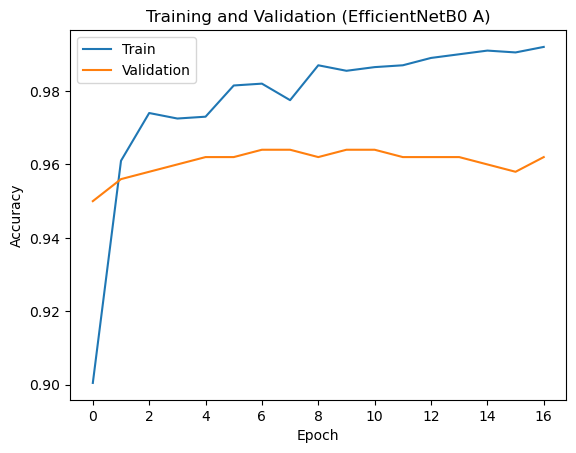

In [ ]:
# Plot para avaliar a accuracy no treino
plt.plot(history_en.history['accuracy'])
plt.plot(history_en.history['val_accuracy'])
plt.title('Training and Validation (EfficientNetB0 A)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

O modelo EfficientNetB0 A demonstrou um comportamento muito estável ao longo do treino. A *accuracy* de treino aumentou progressivamente até atingir cerca de 99%, enquanto a *accuracy* do conjunto de validação estabilizou próximo dos 96%, o que indica uma boa capacidade de generalização e ausência de overfitting.
Apesar de se ter verificado uma ligera diminuição da *accuracy* do conjunto de validação após a 10º época, esta variação foi considerada pouco significativa, uma vez que a diferença entre os desempenhos de treino e validação foi reduzida.

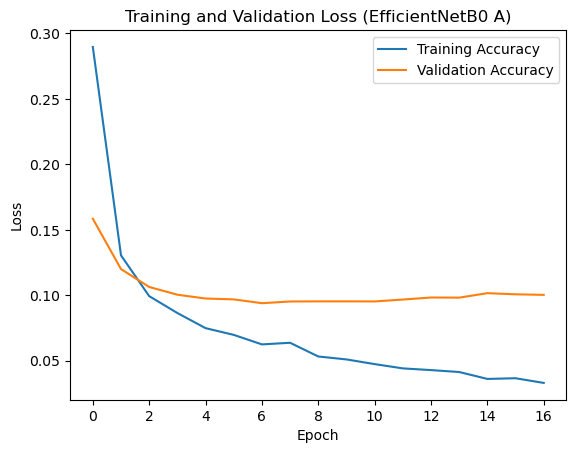

In [ ]:
# Plot para avaliar a função perda durante o treino
plt.plot(history_en.history['loss'])
plt.plot(history_en.history['val_loss'])
plt.title('Training and Validation Loss (EfficientNetB0 A)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

A evolução da função perda confirma esta estabilidade, com a perda de validação a manter-se baixa e estável a partir das primeiras épocas.  

Para uma análise mais detalhada do desempenho do modelo no conjunto de teste, foi utilizada a matriz de confusão, bem como o reporte de classificação, para observar a *precision* e *recall* para cada classe.

In [25]:
# Função para obter os valores reais e as predições do modelo em arrays, para cálculo da confusion matrix e métricas
def get_predictions(model, dataset):
    y_true = []
    y_pred = []

    # Loop para obter os valores reais e preditos. Sendo uma classificação binária, aplica-se o threshold de 0.5 às predições.
    for images, labels in dataset:
        predictions = model.predict(images, verbose = 0)
        y_true.extend(labels.numpy())
        y_pred.extend((predictions > 0.5).astype(int).flatten())

    return np.array(y_true), np.array(y_pred)

Carregamento dos pesos do melhor modelo guardado durante o treino, utilizando o callback `ModelCheckpoint`.

In [ ]:
# Restaurar os melhores pesos salvos
model_en.load_weights("tmp/best_model_en.h5")

#### Matriz de Confusão

In [ ]:
# Obter os valores reais e os preditos, usando a função get_predictions criada anteriormente (Parte 2)
y_true, y_pred = get_predictions(model_en, test_ds_en)

In [ ]:
# Função para observar as métricas e a matriz de confusão
def metrics_score(actual, predicted, class_names=['Cat', 'Dog']):
    print(classification_report(actual, predicted, target_names=class_names))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

              precision    recall  f1-score   support

         Cat       0.98      0.97      0.98       249
         Dog       0.97      0.98      0.98       251

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



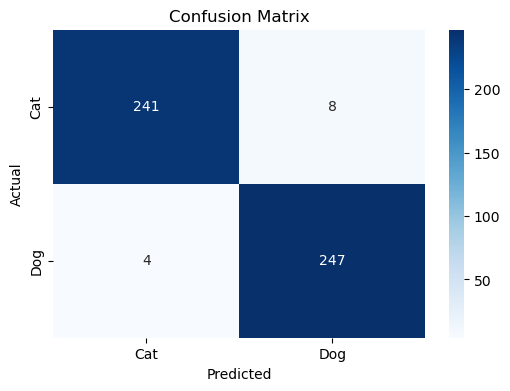

In [ ]:
# Display das métricas
metrics_score(y_true, y_pred)

As métricas de avaliação obtidas mostram um desempenho equilibrado entre as duas classes.  
Para a classe "Cat", a *precision* foi de 0.98 e o *recall* de 0.97, enquanto para a classe "Dog" foi observado o inverso,  *precision* de 0.97 e *recall* de 0.98.   
Isto indica que o modelo tem uma ligeira tendência para classificar corretamente os verdadeiros cães (menos falsos negativos), e para evitar confundir gatos com cães (menos falsos positivos).  
No geral, o número de erros é muito reduzido e a performance é bastante homogénea entre as classes.

A matriz de confusão mostra que apenas 12 de um total de 500 imagens foram classificadas incorretamente, o que evidencia um desempenho robusto e consistente do modelo nesta tarefa de classificação binária.

### Modelo EfficientNetB0 B

Procedemos de forma semelhante para o modelo EfficientNetB0 B, estruturalmente idêntico ao EfficientNetB0 A, mas treinado com um *learning rate* inferior (0.0001), permitindo analisar o impacto desta variação na performance do modelo.

In [29]:
# Novo caminho para guardar o modelo
best_model_path_lowlr = "tmp/best_model_en_lr0001.h5"

# Limpar sessão anterior
backend.clear_session()

Criação do modelo EfficientNetB0 B, com a mesma arquitetura do modelo anterior: EfficientNetB0 como base congelada para extração de características, seguida de uma camada densa com ativação sigmoide para classificação binária.

In [31]:
# Criar modelo
model_en_lowlr = Sequential()
model_en_lowlr.add(EfficientNetB0(include_top = False, pooling = 'avg', weights = 'imagenet'))
model_en_lowlr.add(Dense(1, activation = 'sigmoid'))
model_en_lowlr.layers[0].trainable = False

In [32]:
# Callbacks
checkpoint_lowlr = tf.keras.callbacks.ModelCheckpoint(best_model_path_lowlr, monitor = 'val_loss', save_best_only = True, mode = 'min', verbose = 1)
early_stopping_lowlr = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

Compilação do modelo EfficientNetB0 B com um *learning rate* reduzido (0.0001), mantendo a função de perda `binary_crossentropy` e a métrica de avaliação `accuracy`, apropriadas para problemas de classificação binária.

In [34]:
# Compilar modelo com learning rate reduzido
model_en_lowlr.compile( optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

O modelo EfficientNetB0-B foi treinado com os mesmos dados e condições do modelo anterior, usando também os callbacks


In [43]:
# Treinar o modelo
history_en_lowlr = model_en_lowlr.fit(
    dados_treino_en,
    epochs = 50,
    validation_data = val_ds_en,
    callbacks = [checkpoint_lowlr, early_stopping_lowlr],
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5656 - loss: 0.6925
Epoch 1: val_loss improved from inf to 0.54247, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 175ms/step - accuracy: 0.5664 - loss: 0.6920 - val_accuracy: 0.7900 - val_loss: 0.5425
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8265 - loss: 0.5096
Epoch 2: val_loss improved from 0.54247 to 0.41624, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.8268 - loss: 0.5093 - val_accuracy: 0.8900 - val_loss: 0.4162
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9028 - loss: 0.3980
Epoch 3: val_loss improved from 0.41624 to 0.33729, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.9029 - loss: 0.3978 - val_accuracy: 0.9320 - val_loss: 0.3373
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9347 - loss: 0.3274
Epoch 4: val_loss improved from 0.33729 to 0.28550, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.9347 - loss: 0.3272 - val_accuracy: 0.9400 - val_loss: 0.2855
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9370 - loss: 0.2885
Epoch 5: val_loss improved from 0.28550 to 0.24932, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.9371 - loss: 0.2883 - val_accuracy: 0.9460 - val_loss: 0.2493
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9407 - loss: 0.2479
Epoch 6: val_loss improved from 0.24932 to 0.22326, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.9408 - loss: 0.2477 - val_accuracy: 0.9480 - val_loss: 0.2233
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9477 - loss: 0.2229
Epoch 7: val_loss improved from 0.22326 to 0.20333, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.9478 - loss: 0.2228 - val_accuracy: 0.9500 - val_loss: 0.2033
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9494 - loss: 0.2066
Epoch 8: val_loss improved from 0.20333 to 0.18769, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - accuracy: 0.9495 - loss: 0.2065 - val_accuracy: 0.9520 - val_loss: 0.1877
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9456 - loss: 0.1927
Epoch 9: val_loss improved from 0.18769 to 0.17528, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.9457 - loss: 0.1926 - val_accuracy: 0.9600 - val_loss: 0.1753
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9502 - loss: 0.1845
Epoch 10: val_loss improved from 0.17528 to 0.16525, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.9503 - loss: 0.1843 - val_accuracy: 0.9620 - val_loss: 0.1653
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9564 - loss: 0.1659
Epoch 11: val_loss improved from 0.16525 to 0.15673, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9565 - loss: 0.1658 - val_accuracy: 0.9620 - val_loss: 0.1567
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9583 - loss: 0.1557
Epoch 12: val_loss improved from 0.15673 to 0.14968, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9584 - loss: 0.1556 - val_accuracy: 0.9600 - val_loss: 0.1497
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9580 - loss: 0.1497
Epoch 13: val_loss improved from 0.14968 to 0.14367, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9581 - loss: 0.1496 - val_accuracy: 0.9600 - val_loss: 0.1437
Epoch 14/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9543 - loss: 0.1496
Epoch 14: val_loss improved from 0.14367 to 0.13843, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9544 - loss: 0.1495 - val_accuracy: 0.9600 - val_loss: 0.1384
Epoch 15/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9612 - loss: 0.1370
Epoch 15: val_loss improved from 0.13843 to 0.13405, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9612 - loss: 0.1369 - val_accuracy: 0.9600 - val_loss: 0.1341
Epoch 16/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9600 - loss: 0.1285
Epoch 16: val_loss improved from 0.13405 to 0.13039, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9601 - loss: 0.1284 - val_accuracy: 0.9600 - val_loss: 0.1304
Epoch 17/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9639 - loss: 0.1243
Epoch 17: val_loss improved from 0.13039 to 0.12683, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9639 - loss: 0.1242 - val_accuracy: 0.9600 - val_loss: 0.1268
Epoch 18/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9633 - loss: 0.1257
Epoch 18: val_loss improved from 0.12683 to 0.12373, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9634 - loss: 0.1256 - val_accuracy: 0.9600 - val_loss: 0.1237
Epoch 19/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9641 - loss: 0.1264
Epoch 19: val_loss improved from 0.12373 to 0.12101, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9641 - loss: 0.1263 - val_accuracy: 0.9600 - val_loss: 0.1210
Epoch 20/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9665 - loss: 0.1155
Epoch 20: val_loss improved from 0.12101 to 0.11871, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9666 - loss: 0.1154 - val_accuracy: 0.9600 - val_loss: 0.1187
Epoch 21/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9641 - loss: 0.1104
Epoch 21: val_loss improved from 0.11871 to 0.11660, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9642 - loss: 0.1103 - val_accuracy: 0.9600 - val_loss: 0.1166
Epoch 22/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9649 - loss: 0.1110
Epoch 22: val_loss improved from 0.11660 to 0.11490, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9650 - loss: 0.1109 - val_accuracy: 0.9600 - val_loss: 0.1149
Epoch 23/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9629 - loss: 0.1102
Epoch 23: val_loss improved from 0.11490 to 0.11320, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.9630 - loss: 0.1101 - val_accuracy: 0.9600 - val_loss: 0.1132
Epoch 24/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9682 - loss: 0.1000
Epoch 24: val_loss improved from 0.11320 to 0.11155, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9682 - loss: 0.0999 - val_accuracy: 0.9600 - val_loss: 0.1115
Epoch 25/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9626 - loss: 0.1072
Epoch 25: val_loss improved from 0.11155 to 0.10998, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.9627 - loss: 0.1071 - val_accuracy: 0.9600 - val_loss: 0.1100
Epoch 26/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9609 - loss: 0.1073
Epoch 26: val_loss improved from 0.10998 to 0.10863, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9610 - loss: 0.1072 - val_accuracy: 0.9600 - val_loss: 0.1086
Epoch 27/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9642 - loss: 0.0986
Epoch 27: val_loss improved from 0.10863 to 0.10747, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9643 - loss: 0.0984 - val_accuracy: 0.9580 - val_loss: 0.1075
Epoch 28/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9687 - loss: 0.0945
Epoch 28: val_loss improved from 0.10747 to 0.10646, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9688 - loss: 0.0944 - val_accuracy: 0.9580 - val_loss: 0.1065
Epoch 29/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9635 - loss: 0.1020
Epoch 29: val_loss improved from 0.10646 to 0.10547, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.9636 - loss: 0.1019 - val_accuracy: 0.9580 - val_loss: 0.1055
Epoch 30/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9624 - loss: 0.0969
Epoch 30: val_loss improved from 0.10547 to 0.10463, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9626 - loss: 0.0968 - val_accuracy: 0.9580 - val_loss: 0.1046
Epoch 31/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9698 - loss: 0.0903
Epoch 31: val_loss improved from 0.10463 to 0.10362, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9699 - loss: 0.0902 - val_accuracy: 0.9580 - val_loss: 0.1036
Epoch 32/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9617 - loss: 0.1014
Epoch 32: val_loss improved from 0.10362 to 0.10273, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9619 - loss: 0.1013 - val_accuracy: 0.9600 - val_loss: 0.1027
Epoch 33/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9673 - loss: 0.0851
Epoch 33: val_loss improved from 0.10273 to 0.10194, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9673 - loss: 0.0851 - val_accuracy: 0.9620 - val_loss: 0.1019
Epoch 34/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9759 - loss: 0.0824
Epoch 34: val_loss improved from 0.10194 to 0.10139, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9759 - loss: 0.0823 - val_accuracy: 0.9620 - val_loss: 0.1014
Epoch 35/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9729 - loss: 0.0884
Epoch 35: val_loss improved from 0.10139 to 0.10065, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9730 - loss: 0.0883 - val_accuracy: 0.9620 - val_loss: 0.1006
Epoch 36/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9690 - loss: 0.0899
Epoch 36: val_loss improved from 0.10065 to 0.10017, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9691 - loss: 0.0898 - val_accuracy: 0.9620 - val_loss: 0.1002
Epoch 37/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9700 - loss: 0.0871
Epoch 37: val_loss improved from 0.10017 to 0.09962, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.9700 - loss: 0.0870 - val_accuracy: 0.9620 - val_loss: 0.0996
Epoch 38/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9738 - loss: 0.0794
Epoch 38: val_loss improved from 0.09962 to 0.09910, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9739 - loss: 0.0794 - val_accuracy: 0.9620 - val_loss: 0.0991
Epoch 39/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9763 - loss: 0.0776
Epoch 39: val_loss improved from 0.09910 to 0.09864, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.9764 - loss: 0.0776 - val_accuracy: 0.9620 - val_loss: 0.0986
Epoch 40/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9733 - loss: 0.0847
Epoch 40: val_loss improved from 0.09864 to 0.09829, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9734 - loss: 0.0846 - val_accuracy: 0.9620 - val_loss: 0.0983
Epoch 41/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9716 - loss: 0.0778
Epoch 41: val_loss improved from 0.09829 to 0.09783, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9717 - loss: 0.0777 - val_accuracy: 0.9620 - val_loss: 0.0978
Epoch 42/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9709 - loss: 0.0805
Epoch 42: val_loss improved from 0.09783 to 0.09734, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9710 - loss: 0.0804 - val_accuracy: 0.9620 - val_loss: 0.0973
Epoch 43/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9730 - loss: 0.0821
Epoch 43: val_loss improved from 0.09734 to 0.09720, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.9731 - loss: 0.0820 - val_accuracy: 0.9620 - val_loss: 0.0972
Epoch 44/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9749 - loss: 0.0756
Epoch 44: val_loss improved from 0.09720 to 0.09696, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9749 - loss: 0.0755 - val_accuracy: 0.9640 - val_loss: 0.0970
Epoch 45/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9735 - loss: 0.0767
Epoch 45: val_loss improved from 0.09696 to 0.09648, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9735 - loss: 0.0766 - val_accuracy: 0.9640 - val_loss: 0.0965
Epoch 46/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9746 - loss: 0.0749
Epoch 46: val_loss improved from 0.09648 to 0.09627, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.9747 - loss: 0.0748 - val_accuracy: 0.9640 - val_loss: 0.0963
Epoch 47/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9765 - loss: 0.0686
Epoch 47: val_loss improved from 0.09627 to 0.09612, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9766 - loss: 0.0685 - val_accuracy: 0.9620 - val_loss: 0.0961
Epoch 48/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9696 - loss: 0.0880
Epoch 48: val_loss improved from 0.09612 to 0.09580, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9697 - loss: 0.0878 - val_accuracy: 0.9620 - val_loss: 0.0958
Epoch 49/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9763 - loss: 0.0714
Epoch 49: val_loss improved from 0.09580 to 0.09562, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9764 - loss: 0.0713 - val_accuracy: 0.9620 - val_loss: 0.0956
Epoch 50/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9772 - loss: 0.0691
Epoch 50: val_loss improved from 0.09562 to 0.09528, saving model to tmp/best_model_en_lr0001.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9773 - loss: 0.0690 - val_accuracy: 0.9620 - val_loss: 0.0953


#### Accuracy e Função perda

Visualização da evolução da *accuracy* e da função de perda ao longo das épocas, para os conjuntos de treino e validação, no modelo EfficientNetB0 B, de modo a comparar o comportamento do modelo com o da versão anterior (EfficientNetB0 A).

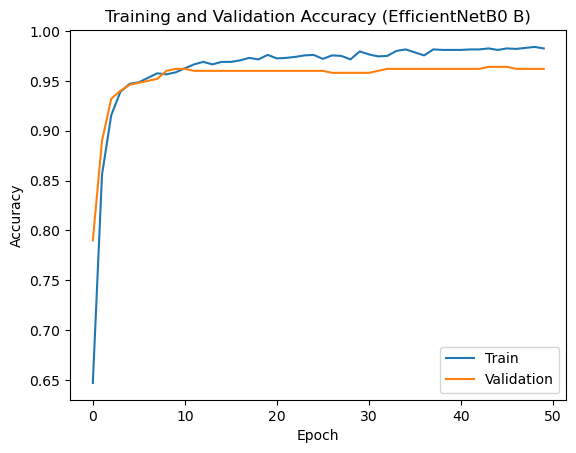

In [45]:
# Plot para avaliar a accuracy do treino
plt.plot(history_en_lowlr.history['accuracy'])
plt.plot(history_en_lowlr.history['val_accuracy'])
plt.title('Training and Validation Accuracy (EfficientNetB0 B)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

O modelo EfficientNetB0 B apresentou uma evolução muito positiva e bem comportada ao longo das épocas, sendo o aumento da *accuracy* estável, com um crescimento progressivo até perto dos 99% no conjunto de treino e estabilização em torno dos 96% no conjunto de validação, de forma semelhante ao modelo A.  
A ausência de oscilações bruscas nas curvas sugere um treino consistente, sem sinais evidentes de overfitting.

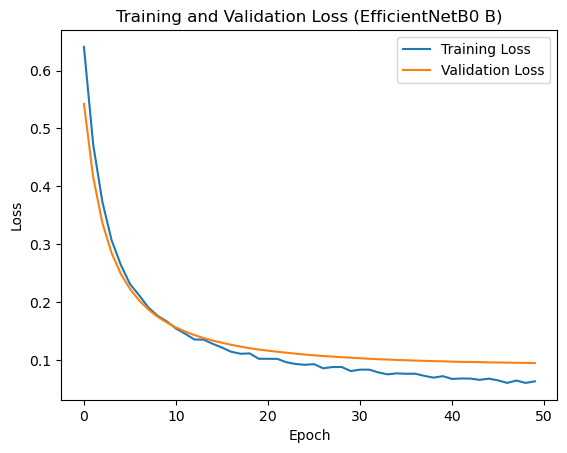

In [48]:
# Plot para avaliar a função perda durante o treino
plt.plot(history_en_lowlr.history['loss'])
plt.plot(history_en_lowlr.history['val_loss'])
plt.title('Training and Validation Loss (EfficientNetB0 B)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc = 'upper right')
plt.show()

A evolução da função perda neste modelo segue também uma trajetória bastante estável, com ambas as curvas (treino e validação) a descerem de forma contínua e controlada ao longo das épocas.

In [51]:
# Restaurar os melhores pesos salvos
model_en_lowlr.load_weights("tmp/best_model_en_lr0001.h5")

#### Matriz de Confusão

              precision    recall  f1-score   support

         Cat       0.98      0.98      0.98       249
         Dog       0.98      0.98      0.98       251

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



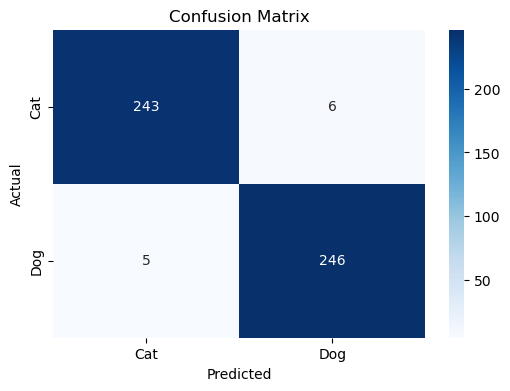

In [54]:
# Classification report e matriz de confusão, usando o conjunto de teste
y_true_lowlr, y_pred_lowlr = get_predictions(model_en_lowlr, test_ds_en)
metrics_score(y_true_lowlr, y_pred_lowlr)

As métricas de avaliação obtidas mostram um desempenho muito semelhante ao do modelo anterior, mantendo um equilíbrio entre as classes.

Para as classes "Cat" e "Dog" obtiveram-se valores de *precision* e *recall* de 0.98, o que demonstra que o modelo é altamente eficaz a identificar corretamente ambas as classes. Ainda assim, observou-se um ligeiro desequilíbrio, com uma imagem adicional da classe "Cat" a ser incorretamente classificada (falso positivo).

A matriz de confusão revela apenas 11 erros num total de 500 imagens, o que demonstra um desempenho muito elevado e estável, reforçando a robustez desta arquitetura também com um *learning rate* inferior.

### Modelo EfficientNetB0 C

Para o modelo EfficientNetB0 C, como mencionado anteriormente, usamos as últimas 20 camadas descongeladas, permitindo ajustá-las ao nosso problema específico. Adicionamos também duas camadas densas com ativação *ReLU*, com o objetivo de analisar o impacto destas camadas adicionais no desempenho global do modelo.

O motivo da escolha de descongelar apenas 20 camadas da EfficientNetB0, foi devido a que as primeiras camadas das redes convolucionais captam características genéricas de baixo nível (como contornos, texturas e formas), enquanto as camadas mais profundas aprendem características específicas da tarefa original. Desta forma, descongelar apenas as camadas finais permite que o nosso modelo se adapte parcialmente à tarefa, preservando o conhecimento previamente aprendido, sendo esta abordagem eficaz quando o conjunto de dados é pequeno/moderado [1].

[1] Ferentinos, K. P. (2018). *A comparative study of fine-tuning deep learning models for plant disease classification*. Computers and Electronics in Agriculture, 161, 272–279. https://doi.org/10.1016/j.compag.2018.03.032


In [ ]:
# Novo caminho para guardar o modelo
best_model_path_extra = "tmp/best_model_extra_layers.h5"

# Limpar sessão anterior
backend.clear_session()

Construção do modelo EfficientNetB0 C, com a base pré-treinada da EfficientNetB0 seguida de duas camadas densas adicionais com ativações *ReLU* (64 e 32 neurónios), intercaladas com camadas de *dropout* e normalização.  
O objetivo destas camadas é aumentar a capacidade de representação do modelo, avaliando o seu impacto no desempenho e na mitigação de overfitting.


In [ ]:
# Construção do modelo com camadas densas ajustadas
model_extra_layers = Sequential()
model_extra_layers.add(EfficientNetB0(include_top = False, pooling = 'avg', weights = 'imagenet'))
model_extra_layers.add(Dense(64, activation = 'relu'))
model_extra_layers.add(Dropout(0.5))
model_extra_layers.add(BatchNormalization())
model_extra_layers.add(Dense(32, activation = 'relu'))
model_extra_layers.add(Dropout(0.5))
model_extra_layers.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Descongelar parcialmente a EfficientNet (fine-tuning das últimas 20 camadas)
base_model = model_extra_layers.layers[0]
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

In [ ]:
# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint(best_model_path_extra, monitor = 'val_loss', save_best_only = True, mode = 'min', verbose = 1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [ ]:
# Compilar o modelo com um learning rate mais baixo para fine-tuning
model_extra_layers.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_extra_layers.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,133,924 (15.77 MB)

 Trainable params: 1,214,001 (4.63 MB)

 Non-trainable params: 2,919,923 (11.14 MB)

O modelo EfficientNetB0 C apresenta um total de 4 133 924 parâmetros, dos quais 1 214 001 são treináveis.  
Para além da base EfficientNetB0, são também observáveis as duas camadas densas com 64 e 32 neurónios respetivamente, intercaladas com *dropout* e normalização por *batch normalization*, com o objetivo de melhorar a capacidade de generalização do modelo.


In [ ]:
history_extra_layers = model_extra_layers.fit(
    dados_treino_en,
    epochs = 50,
    validation_data = val_ds_en,
    callbacks = [checkpoint, early_stopping],
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5723 - loss: 0.7958
Epoch 1: val_loss improved from inf to 0.39378, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 177ms/step - accuracy: 0.5729 - loss: 0.7946 - val_accuracy: 0.9180 - val_loss: 0.3938
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.7829 - loss: 0.4481
Epoch 2: val_loss improved from 0.39378 to 0.27502, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.7832 - loss: 0.4478 - val_accuracy: 0.9580 - val_loss: 0.2750
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8621 - loss: 0.3439
Epoch 3: val_loss improved from 0.27502 to 0.20396, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.8622 - loss: 0.3437 - val_accuracy: 0.9700 - val_loss: 0.2040
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8746 - loss: 0.3073
Epoch 4: val_loss improved from 0.20396 to 0.16290, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.8748 - loss: 0.3070 - val_accuracy: 0.9700 - val_loss: 0.1629
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9196 - loss: 0.2539
Epoch 5: val_loss improved from 0.16290 to 0.13761, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - accuracy: 0.9196 - loss: 0.2537 - val_accuracy: 0.9740 - val_loss: 0.1376
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9139 - loss: 0.2266
Epoch 6: val_loss improved from 0.13761 to 0.11935, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.9141 - loss: 0.2264 - val_accuracy: 0.9760 - val_loss: 0.1194
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9325 - loss: 0.2076
Epoch 7: val_loss improved from 0.11935 to 0.10700, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.9327 - loss: 0.2073 - val_accuracy: 0.9760 - val_loss: 0.1070
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9494 - loss: 0.1651
Epoch 8: val_loss improved from 0.10700 to 0.09616, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.9495 - loss: 0.1650 - val_accuracy: 0.9780 - val_loss: 0.0962
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9547 - loss: 0.1547
Epoch 9: val_loss improved from 0.09616 to 0.08854, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.9547 - loss: 0.1547 - val_accuracy: 0.9760 - val_loss: 0.0885
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9595 - loss: 0.1321
Epoch 10: val_loss improved from 0.08854 to 0.08278, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.9595 - loss: 0.1321 - val_accuracy: 0.9780 - val_loss: 0.0828
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9635 - loss: 0.1220
Epoch 11: val_loss improved from 0.08278 to 0.07884, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.9635 - loss: 0.1220 - val_accuracy: 0.9740 - val_loss: 0.0788
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9654 - loss: 0.1204
Epoch 12: val_loss improved from 0.07884 to 0.07585, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9655 - loss: 0.1202 - val_accuracy: 0.9740 - val_loss: 0.0759
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9625 - loss: 0.1018
Epoch 13: val_loss did not improve from 0.07585
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9626 - loss: 0.1017 - val_accuracy: 0.9720 - val_loss: 0.0759
Epoch 14/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9681 - loss: 0.1009
Epoch 14: val_loss improved from 0.07585 to 0.07348, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.9682 - loss: 0.1009 - val_accuracy: 0.9720 - val_loss: 0.0735
Epoch 15/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9845 - loss: 0.0721
Epoch 15: val_loss improved from 0.07348 to 0.07337, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.9845 - loss: 0.0721 - val_accuracy: 0.9760 - val_loss: 0.0734
Epoch 16/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9866 - loss: 0.0697
Epoch 16: val_loss improved from 0.07337 to 0.07235, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.9865 - loss: 0.0697 - val_accuracy: 0.9740 - val_loss: 0.0723
Epoch 17/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9783 - loss: 0.0818
Epoch 17: val_loss improved from 0.07235 to 0.06891, saving model to tmp/best_model_extra_layers.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.9783 - loss: 0.0816 - val_accuracy: 0.9740 - val_loss: 0.0689
Epoch 18/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9726 - loss: 0.0907
Epoch 18: val_loss did not improve from 0.06891
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.9726 - loss: 0.0906 - val_accuracy: 0.9660 - val_loss: 0.0713
Epoch 19/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9737 - loss: 0.0977
Epoch 19: val_loss did not improve from 0.06891
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.9738 - loss: 0.0975 - val_accuracy: 0.9740 - val_loss: 0.0723
Epoch 20/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9898 - loss: 0.0494
Epoch 20: val_loss did not improve from 0.06891
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.9897 - loss: 0.0495 - val_accuracy: 0.9740 - val_loss: 0.0700
Epoch 21/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9802 - loss: 0.0746
Epoch 21: val_loss did

#### Accuracy e Função Perda

Visualização da evolução da *accuracy* e da função de perda ao longo das épocas, para os conjuntos de treino e validação, no modelo EfficientNetB0 C

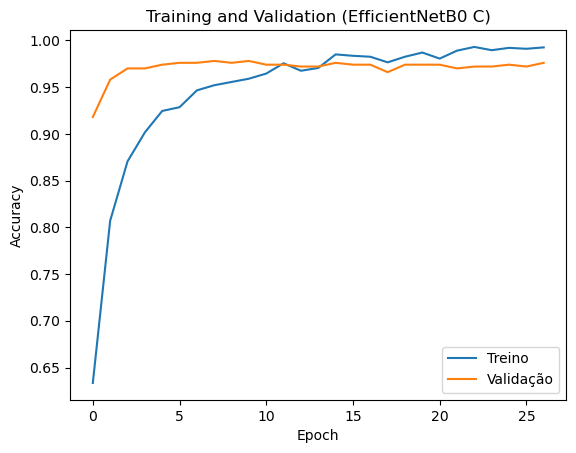

In [ ]:
# Plot para avaliar a accuracy do treino
plt.plot(history_extra_layers.history['accuracy'])
plt.plot(history_extra_layers.history['val_accuracy'])
plt.title('Training and Validation (EfficientNetB0 C)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'lower right')
plt.show()

O modelo EfficientNetB0 C, que inclui *fine-tuning* com as últimas 20 camadas descongeladas e camadas densas adicionais, apresentou uma evolução bastante positiva ao longo do treino.  
As curvas de *accuracy* apresentam um crescimento consistente para ambos conjuntos, estabilizando mais rapidamente para o conjunto de validação. A *accuracy* de treino aproxima-se dos 99%, enquanto a de validação estabiliza ligeiramente abaixo dos 97%, o que sugere uma boa generalização mesmo com o aumento da complexidade do modelo.

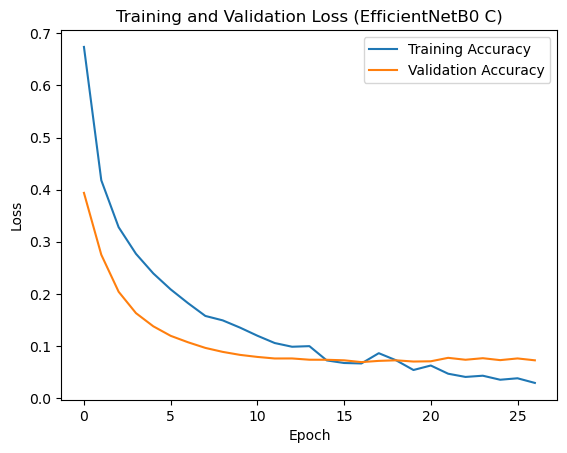

In [ ]:
# Plot para avaliar a função perda durante o treino
plt.plot(history_extra_layers.history['loss'])
plt.plot(history_extra_layers.history['val_loss'])
plt.title('Training and Validation Loss (EfficientNetB0 C)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

A evolução da função de perda mostra uma descida clara e progressiva para ambos conjuntos.
As curvas são visualmente “limpas” e mantêm-se próximas uma da outra, o que demonstra que o modelo está a aprender sem sinais fortes de overfitting, mesmo com mais parâmetros ajustáveis.

In [ ]:
# Restaurar os melhores pesos salvos
model_extra_layers.load_weights("tmp/best_model_extra_layers.h5")

#### Matriz de Confusão

              precision    recall  f1-score   support

         Cat       0.96      0.97      0.96       249
         Dog       0.97      0.96      0.96       251

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



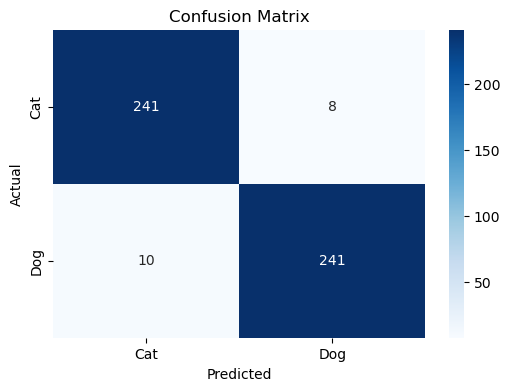

In [ ]:
# Classification report e matriz de confusão, usando o conjunto de teste
y_true_extra, y_pred_extra = get_predictions(model_extra_layers, test_ds_en)
metrics_score(y_true_extra, y_pred_extra)

Apesar de apresentar valores de *precision* e *recall* ligeiramente inferiores aos modelos A e B (com diferenças em torno de 1%), o desempenho do modelo EfficientNetB0 C continua a ser excelente.  
Para a classe "Cat", a *precision* foi de 0.96 e o *recall* de 0.97, enquanto para a classe "Dog" os valores foram de 0.97 e 0.96, respetivamente.  Estes resultados mostram que o modelo mantém uma boa capacidade de distinção entre as classes, com um equilíbrio muito semelhante aos modelos anteriores.

A matriz de confusão mostra que 18 imagens em 500 foram classificadas incorretamente, o que continua a refletir um desempenho robusto.

## Modelo Resnet50

In [98]:
# Importação do Modelo
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [100]:
# Data Augmentation para aumentar o dataset de treino e evitar overfitting
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
])

In [102]:
# Aplicação do Data Augmentation e definição do novo set de treino
train_datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
treino_gerado = train_datagen.flow_from_directory(
    directory_train,
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [104]:
# Preprocessing específico do Resnet
dados_treino_kt = dados_treino.map(lambda x,y : (preprocess_input(x), y))
val_ds_kt = val_ds.map(lambda x,y : (preprocess_input(x), y))
test_ds_kt = test_ds.map(lambda x,y : (preprocess_input(x), y))

In [106]:
# Definição do modelo com a arquitetura do Resnet50, como os pesos do Imagenet, e com algumas camadas adicionais para evitar Overfitting
model_kt2 = Sequential()

model_kt2.add(resnet50.ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
model_kt2.add(Dropout(0.3))
model_kt2.add(Dense(64, activation = 'relu'))
model_kt2.add(BatchNormalization())
model_kt2.add(Dropout(0.5))
model_kt2.add(Dense(1, activation = 'sigmoid'))

model_kt2.layers[0].trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [108]:
# Definição do método de optimização, da taxa de aprendizado e display da arquitetura final
from tensorflow.python.keras import optimizers

optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model_kt2.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model_kt2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,719,169 (90.48 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 23,587,840 (89.98 MB)

In [110]:
# Checkpoints, Earlystopping e o caminho para salvar o melhor modelo
best_model_path2 = "tmp/best_model_kt.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(best_model_path2, monitor = 'val_loss', save_best_only = True, mode = 'min', verbose = 1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',  patience = 10, mode = 'min', restore_best_weights = True),

In [112]:
# Treino do modelo
history_kt2 = model_kt2.fit(
    dados_treino_kt,
    epochs = 20,
    validation_data = (val_ds_kt),
    callbacks = [checkpoint, early_stopping]
    )

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8763 - loss: 0.2941
Epoch 1: val_loss improved from inf to 0.13868, saving model to tmp/best_model_kt.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 235ms/step - accuracy: 0.8768 - loss: 0.2932 - val_accuracy: 0.9500 - val_loss: 0.1387
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9494 - loss: 0.1243
Epoch 2: val_loss improved from 0.13868 to 0.12325, saving model to tmp/best_model_kt.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.9494 - loss: 0.1244 - val_accuracy: 0.9520 - val_loss: 0.1233
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9562 - loss: 0.1242
Epoch 3: val_loss improved from 0.12325 to 0.12148, saving model to tmp/best_model_kt.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.9562 - loss: 0.1242 - val_accuracy: 0.9440 - val_loss: 0.1215
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9687 - loss: 0.0891
Epoch 4: val_loss improved from 0.12148 to 0.11505, saving model to tmp/best_model_kt.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.9687 - loss: 0.0890 - val_accuracy: 0.9560 - val_loss: 0.1151
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9669 - loss: 0.0772
Epoch 5: val_loss did not improve from 0.11505
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.9670 - loss: 0.0771 - val_accuracy: 0.9440 - val_loss: 0.1378
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9773 - loss: 0.0656
Epoch 6: val_loss did not improve from 0.11505
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.9773 - loss: 0.0656 - val_accuracy: 0.9500 - val_loss: 0.1291
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9732 - loss: 0.0711
Epoch 7: val_loss did not improve from 0.11505
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.9732 - loss: 0.0712 - val_accuracy: 0.9540 - val_loss: 0.1394
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9730 - loss: 0.0668
Epoch 8: val_loss did not i

#### Accuracy e Função Perda

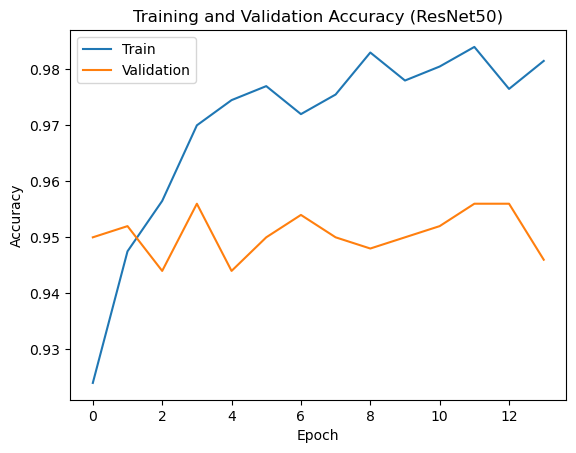

In [114]:
# Código para os gráficos do treino
plt.plot(history_kt2.history['accuracy'])
plt.plot(history_kt2.history['val_accuracy'])
plt.title('Training and Validation Accuracy (ResNet50)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

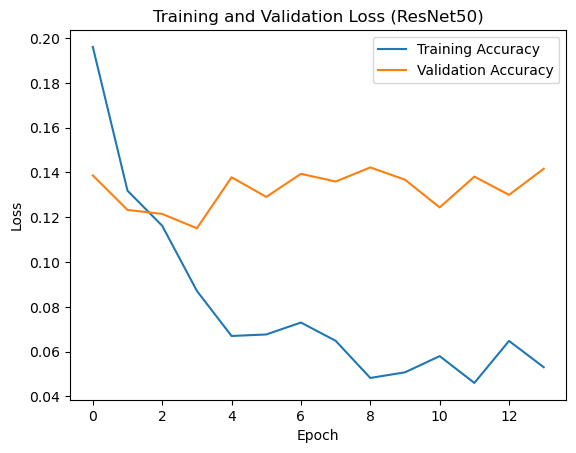

In [116]:
# Plot para avaliar a função perda durante o treino
plt.plot(history_kt2.history['loss'])
plt.plot(history_kt2.history['val_loss'])
plt.title('Training and Validation Loss (ResNet50)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc = 'upper right')
plt.show()

#### Matriz de Confusão

              precision    recall  f1-score   support

         Cat       0.99      0.96      0.97       249
         Dog       0.96      0.99      0.97       251

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



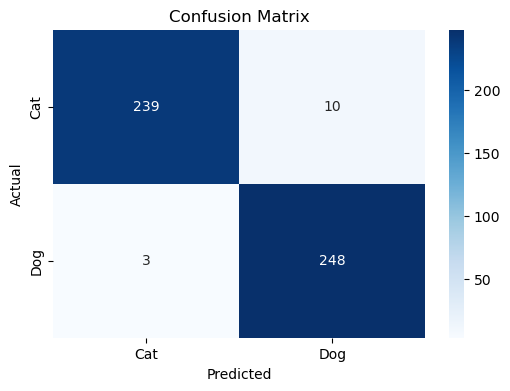

In [118]:
# Função para obter os valores reais e as predições do modelo em arrays, para cálculo da confusion matrix e métricas
def get_predictions(model, dataset):
    y_true = []
    y_pred = []

    # Loop para obter os valores reais e preditos. Sendo uma classificação binária, aplica-se o threshold de 0.5 às predições.
    for images, labels in dataset:
        predictions = model.predict(images, verbose = 0)  # Fazendo as predições
        y_true.extend(labels.numpy())  # Armazenando as labels reais
        y_pred.extend((predictions > 0.5).astype(int).flatten())  # Aplicando o threshold de 0.5

    return np.array(y_true), np.array(y_pred)

# Carregar pesos da melhor versão
model_kt2.load_weights("tmp/best_model_kt.h5")

# Obter as predições no conjunto de teste
y_true, y_pred = get_predictions(model_kt2, test_ds_kt)

# Função para observar as métricas e a matriz de confusão
def metrics_score(actual, predicted, class_names=['Cat', 'Dog']):
    # Exibir o relatório de classificação com métricas como precisão, recall, e f1-score
    print(classification_report(actual, predicted, target_names=class_names))

    # Gerar a matriz de confusão
    cm = confusion_matrix(actual, predicted)

    # Plotando a matriz de confusão com o seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Chamar a função de métricas e matriz de confusão
metrics_score(y_true, y_pred)

# Parte 4

#### Predições com imagens dos nossos animais de estimação (EfficientNet)

De entre todos os modelos baseados na EfficientNet, foi selecionado o modelo A para realizar as predições finais, com base no seu desempenho consistente: apresentou uma *accuracy* elevada, curvas de treino e validação estáveis, perda reduzida e valores de *precision* e *recall* satisfatórios no conjunto de teste.


As predições foram feitas utilizando imagens reais de animais fornecidas pelos membros do grupo.  
O ciclo implementado percorre a lista de imagens, aplicando o mesmo pré-processamento utilizado no treino do modelo. Para cada imagem, foi feita a predição e foram apresentadas as probabilidades de pertencer a cada uma das classes (cão ou gato).

 - - - - - - - - - - - - - - - - - - - - - -



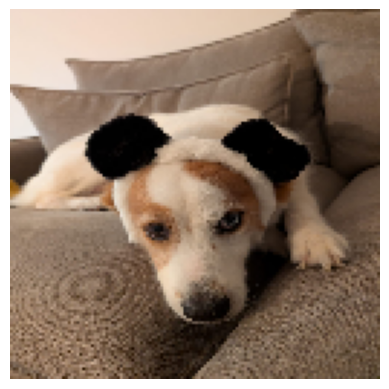

Probabilidade de ser cão: 98.2 %
Probabilidade de ser gato: 1.8 %
 - - - - - - - - - - - - - - - - - - - - - -



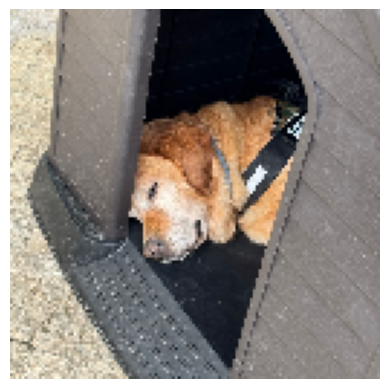

Probabilidade de ser cão: 95.98 %
Probabilidade de ser gato: 4.02 %
 - - - - - - - - - - - - - - - - - - - - - -



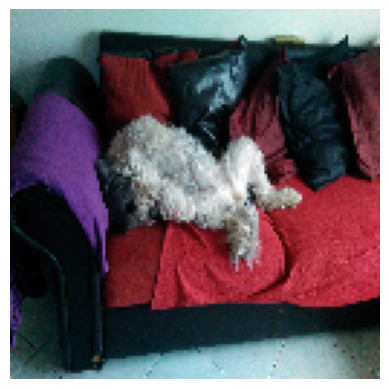

Probabilidade de ser cão: 20.38 %
Probabilidade de ser gato: 79.62 %
 - - - - - - - - - - - - - - - - - - - - - -



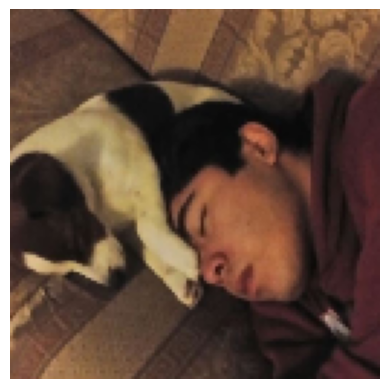

Probabilidade de ser cão: 55.15 %
Probabilidade de ser gato: 44.85 %
 - - - - - - - - - - - - - - - - - - - - - -



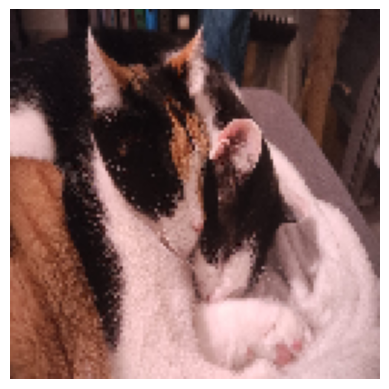

Probabilidade de ser cão: 5.99 %
Probabilidade de ser gato: 94.01 %
 - - - - - - - - - - - - - - - - - - - - - -



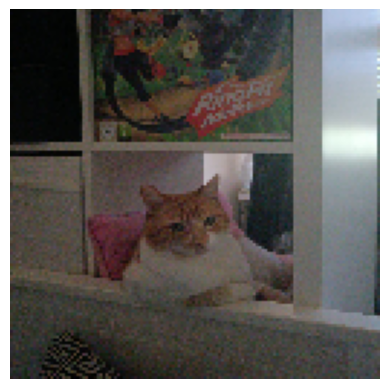

Probabilidade de ser cão: 1.36 %
Probabilidade de ser gato: 98.64 %
 - - - - - - - - - - - - - - - - - - - - - -



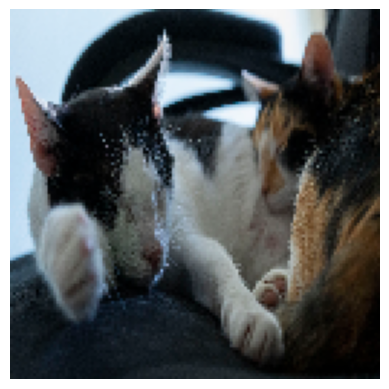

Probabilidade de ser cão: 34.24 %
Probabilidade de ser gato: 65.76 %
 - - - - - - - - - - - - - - - - - - - - - -



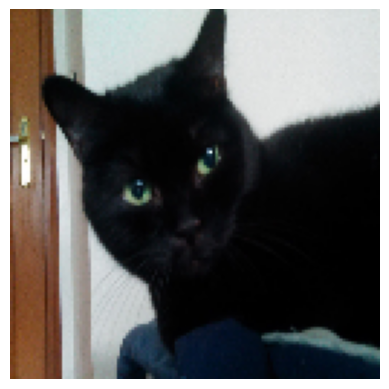

Probabilidade de ser cão: 0.02 %
Probabilidade de ser gato: 99.98 %


In [75]:
from tensorflow.keras.preprocessing import image

# Definir o path da imagem, com as mesmas dimensões e preprocessing usadas no modelo
image_path_list = [
    "an_estimacao/cao1.png",
    "an_estimacao/cao2.png",
    "an_estimacao/cao3.png",
    "an_estimacao/cao4.png",
    "an_estimacao/gato1.png",
    "an_estimacao/gato2.png",
    "an_estimacao/gato3.png",
    "an_estimacao/gato4.png"
]

for image_path in image_path_list:
    img = image.load_img(image_path, target_size = (128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    img_array = preprocess_input(img_array)

    print(' - - - - - - - - - - - - - - - - - - - - - -\n')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Fazer a predição, e mostrar o resultado
    prediction = model_en_lowlr.predict(img_array, verbose = 0)

    # Definir as probabilidades de cada classe, e mostrar as probabilidades
    prob_cao = prediction[0][0]
    prob_gato = 1 - prob_cao
    print("Probabilidade de ser cão:", float(round(prob_cao * 100, 2)), "%")
    print("Probabilidade de ser gato:", float(round(prob_gato * 100, 2)), "%")


#### Predições erradas (EfficientNet)

Para identificar as imagens mal classificadas, utilizou-se o seguinte código que percorre o conjunto de teste em batches.
Como cada iteração do dataset devolve um lote de imagens, é necessário um ciclo interno para analisar cada predição individualmente e comparar com o respetivo valor real.


In [66]:
# Lista para guardar os exemplos em que o modelo falhou a predição (FPs e FNs)
erros = []

# Percorrer o conjunto de teste e identificar erros
for imagens, labels in test_ds_en:
    preds = model_en_lowlr.predict(imagens, verbose=0)
    preds_bin = (preds > 0.5).astype(int).flatten()
    labels_np = labels.numpy().astype(int).flatten()

    # Detetar erros e guardar os dados relevantes
    for i in range(len(preds_bin)):
        if preds_bin[i] != labels_np[i]:
            erros.append({'imagem': imagens[i],
                          'real': labels_np[i],
                          'predito': preds_bin[i],
                          'prob_cao': preds[i][0]})

 - - - - - - - - - - - - - - - - - - - - - -



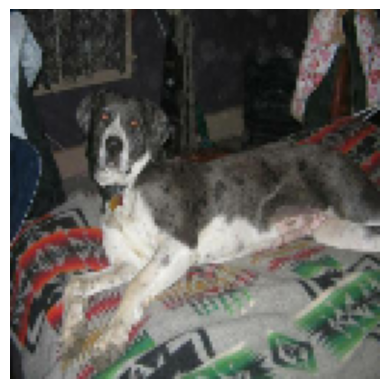

Classe real: cão, classe predita: gato,
Probabilidade de ser cão: 34.11 %
Probabilidade de ser gato: 65.89 %
 - - - - - - - - - - - - - - - - - - - - - -



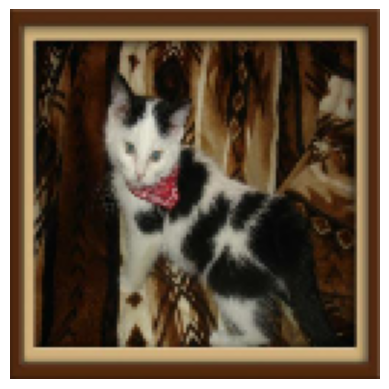

Classe real: gato, classe predita: cão,
Probabilidade de ser cão: 55.83 %
Probabilidade de ser gato: 44.17 %
 - - - - - - - - - - - - - - - - - - - - - -



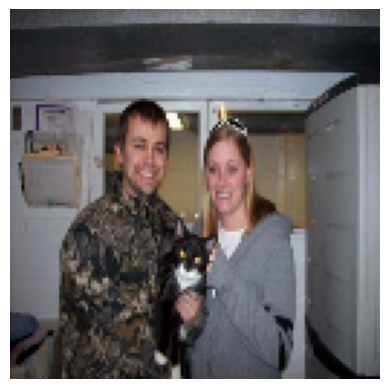

Classe real: gato, classe predita: cão,
Probabilidade de ser cão: 66.8 %
Probabilidade de ser gato: 33.2 %
 - - - - - - - - - - - - - - - - - - - - - -



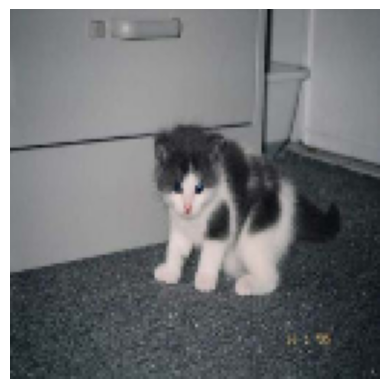

Classe real: gato, classe predita: cão,
Probabilidade de ser cão: 73.73 %
Probabilidade de ser gato: 26.27 %
 - - - - - - - - - - - - - - - - - - - - - -



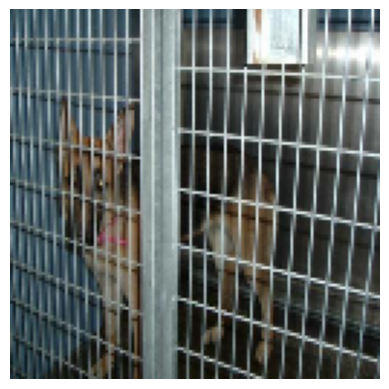

Classe real: cão, classe predita: gato,
Probabilidade de ser cão: 21.85 %
Probabilidade de ser gato: 78.15 %
 - - - - - - - - - - - - - - - - - - - - - -



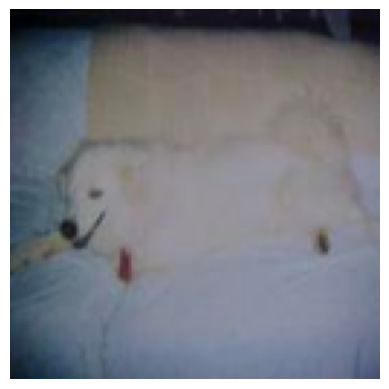

Classe real: cão, classe predita: gato,
Probabilidade de ser cão: 7.07 %
Probabilidade de ser gato: 92.93 %
 - - - - - - - - - - - - - - - - - - - - - -



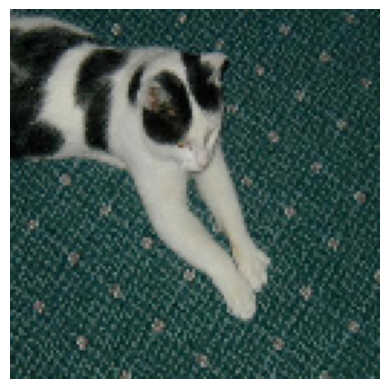

Classe real: gato, classe predita: cão,
Probabilidade de ser cão: 80.31 %
Probabilidade de ser gato: 19.69 %
 - - - - - - - - - - - - - - - - - - - - - -



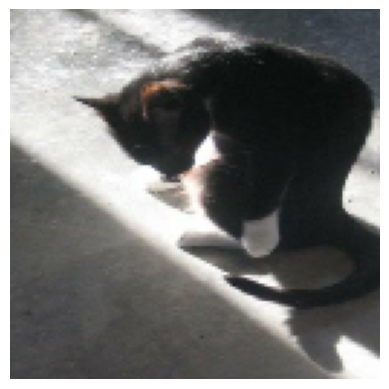

Classe real: gato, classe predita: cão,
Probabilidade de ser cão: 67.2 %
Probabilidade de ser gato: 32.8 %
 - - - - - - - - - - - - - - - - - - - - - -



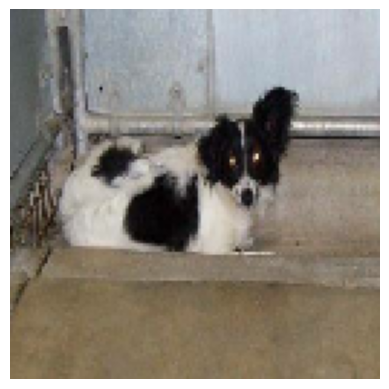

Classe real: cão, classe predita: gato,
Probabilidade de ser cão: 2.61 %
Probabilidade de ser gato: 97.39 %
 - - - - - - - - - - - - - - - - - - - - - -



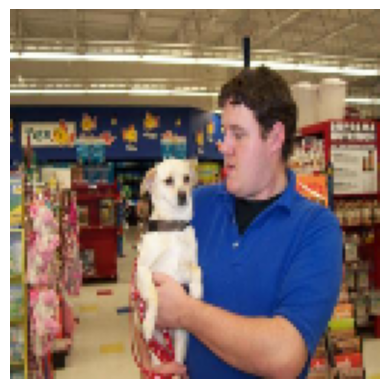

Classe real: cão, classe predita: gato,
Probabilidade de ser cão: 40.52 %
Probabilidade de ser gato: 59.48 %
 - - - - - - - - - - - - - - - - - - - - - -



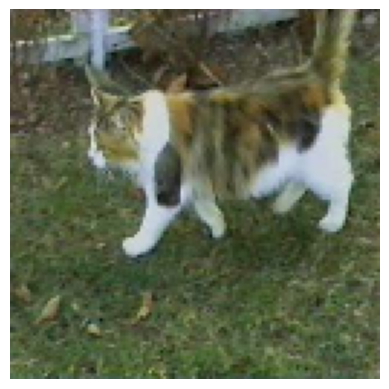

Classe real: gato, classe predita: cão,
Probabilidade de ser cão: 83.96 %
Probabilidade de ser gato: 16.04 %


In [67]:
# Mostrar as imagens, a classe real e classe predita, e as probabilidades
for erro in erros:
    print(' - - - - - - - - - - - - - - - - - - - - - -\n')
    plt.imshow(erro['imagem'].numpy().astype('uint8'))
    plt.axis('off')
    plt.show()

    prob_cao = erro['prob_cao']
    prob_gato = 1 - prob_cao

    classe_real = 'cão' if erro['real'] == 1 else 'gato'
    classe_predita = 'cão' if erro['predito'] == 1 else 'gato'

    print("Classe real:", classe_real + ",", "classe predita:", classe_predita + ",")
    print("Probabilidade de ser cão:", float(round(prob_cao * 100, 2)), "%")
    print("Probabilidade de ser gato:", float(round(prob_gato * 100, 2)), "%")